# End-to-end Machine Learning project

# Author: Fernando Perna, Nicholas Sarbinowski, Gia Chiem, An Pham

**Original Dataset Source: 2022 World Cup Stats. https://www.kaggle.com/datasets/greysonmb/2022-world-cup-stats.**

# 2022 World Cup Dataset Description

**Attributes for 2022worldcup.csv dataset:**

1. squad - country (unique values)

2. pi - player size (numeric: from 18 to 26)

3. age - average age (numeric: from 24.9 to 29.7)

4. poss - possession (numeric: from 31.3 to 75.8)

5. mp - matches played (numeric: from 3 to 7)

6. starts - starts (numeric: from 33 to 77)

7. min - minutes played (numeric: from 270 to 690)

8. 90s - 90's played (numeric: from 3 to 7.7)

9. gls - goals scored (numeric: from 1 to 16)

10. ast - assists (numeric: from 0 to 12)

11. g + a - goals and assists (numeric: from 1 to 28)

12. g-pk - non-penalty goals (numeric: from 0 to 14)

13. pk - penalty kicks made (numeric: from 0 to 4)

14. pkatt - penalty kicks attempted (numeric: from 0 to 5)

15. crdy - yellow cards (numeric: from 1 to 17)

16. crdr - red c ards (numeric: from 0 to 1)

17. xg - expected goals (numeric: from 1.4 to 15.1)

18. npxg - non-penalty expected goals (numeric: from 1.4 to 12.2)

19. xag - expected assisted goals (numeric: from 0.6 to 10.3)

20. npxg+xag - non-penalty expected goals plus assisted goals (numeric: from 2 to 22.5)

21. prgc - progressive carries (numeric: from 21 to 173)

22. prgp - progressive passes (numeric: from 51 to 348)

23. gls90 - goals scored per 90 minutes (numeric: from 0.33 to 2.6)

24. ast90 - assists per 90 minutes (numeric: from 0 to 2.2)

25. g+a90 - goals and assists per 90 minutes (numeric: from 0.33 to 4.8)

26. g-pk90 - non-penalty goals per 90 minutes (numeric: from 0 to 2.4)

27. g+a-pk90 - non-penalty goals + assists per 90 minutes (numeric: from 0 to 4.6)

28. xg90 - expected goals per 90 minutes (numeric: from 0.47 to 3.35)

29. xag90 - expected assisted goals per 90 minutes (numeric: from 0.2 to 2.5)

30. xg+xag90 - expected goals plus assisted gals per 90 minutes (numeric: from 0.68 to 5.85)

31. npxg90 - non-penalty expected goals per 90 minutes (numeric: from 0.47 to 3.09)

32. npxg+xag90 - non-penalty expected goals plus assisted goals per 90 minutes (numeric: from 0.68 to 5.59)

# 1- Look at the big picture and load the data

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A regression task – predict a value.
3. Batch learning
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
The business objective is to predict the possession each country should have during soccer matches based on various factors.

In [1]:
# Import libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset is being read from our github page at https://raw.githubusercontent.com/chiemgiabaost/Project_group_12/main/2022worldcup.csv
url = "https://raw.githubusercontent.com/chiemgiabaost/Project_group_12/main/2022worldcup.csv"
stats = pd.read_csv(url, sep=',')

#Created a backup copy of the dataset
stats_backup = stats

# 2. Explore and visualize the data to gain insights.


#### 2.1 Let's look at correlations with regard to our target

In [2]:
corr_matrix = stats.corr(numeric_only=True)
#Compare correlations based on our target (possession)
corr_matrix["Poss"].sort_values(ascending=False)

Poss          1.000000
PrgP          0.661730
xG+xAG90      0.527381
xAG90         0.525845
npxG+xAG90    0.513411
xG90          0.511401
npxG90        0.497286
xAG           0.480090
npxG+xAG      0.466596
xG            0.455246
Ast90         0.455048
npxG          0.452931
G+A90         0.446664
PrgC          0.445135
Ast           0.437578
G+A           0.433019
G+A-PK90      0.426796
Gls           0.418743
Gls90         0.416399
G-PK          0.402733
G-PK90        0.380004
PK            0.331112
PKatt         0.274616
90s           0.193980
Min           0.193908
Starts        0.183742
MP            0.183742
# Pl         -0.027711
CrdR         -0.176382
CrdY         -0.244508
Age          -0.366198
Name: Poss, dtype: float64

#### 2.2 Plot Poss vs. PrgP using sns.lineplot, and create a scatterplot for Poss and PrgP

Text(0, 0.5, 'Poss')

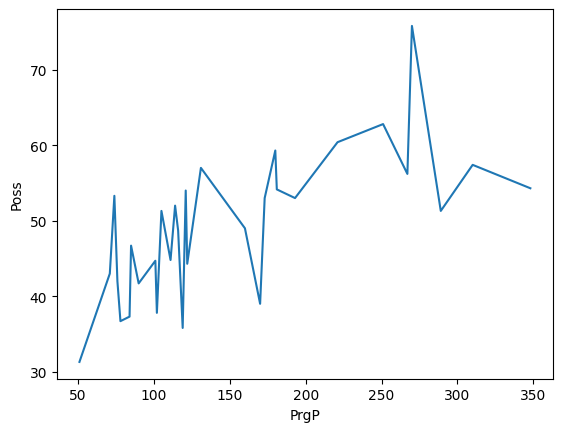

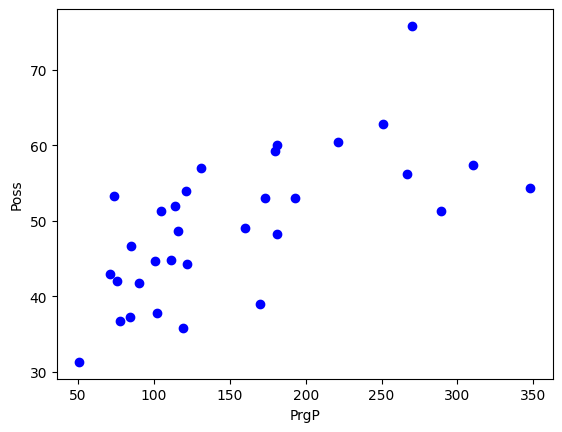

In [3]:
#plot Poss vs PrgP
g = sns.lineplot(x="PrgP", y="Poss", data=stats, errorbar=None)

# Create a scatterplot of Poss and PrgP
X = stats["PrgP"]
y = stats["Poss"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("PrgP")
plt.ylabel("Poss")

####2.3 Plot Poss vs. Expected Goal(Eg) and Goal(Gls) using sns.lineplot, and create a scatterplot for Plot Poss vs. Expected Goal(Eg) and Goal(Gls)####


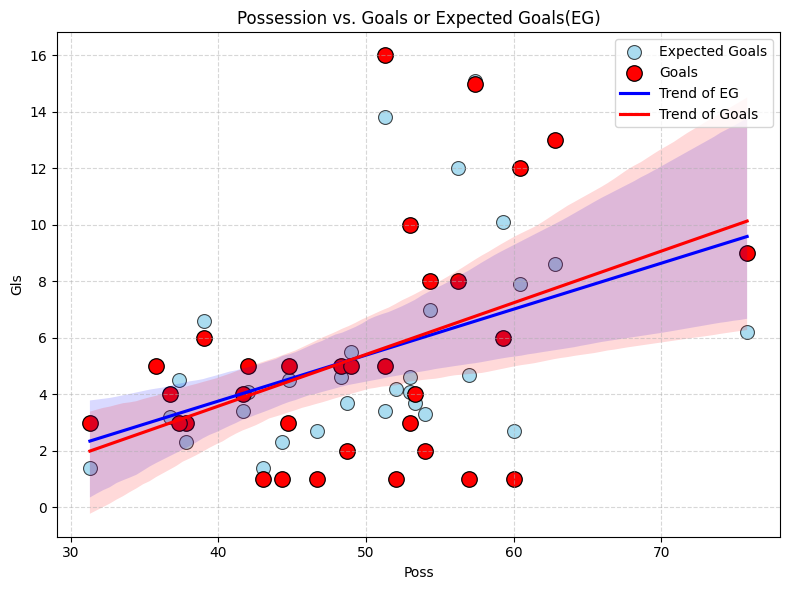

In [4]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Poss', y='xG', data=stats, s=100, color='skyblue', edgecolor='black', alpha=0.7, label='Expected Goals')

# Scatter plot for Goals
sns.scatterplot(x='Poss', y='Gls', data=stats, s=125, color='red', edgecolor='black', label='Goals')

# Add title and labels
plt.title('Possession vs. Goals or Expected Goals(EG)')
plt.xlabel('Possession (%)')
plt.ylabel('Goals')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add trend line
sns.regplot(x='Poss', y='xG', data=stats, scatter=False, color='blue', label='Trend of EG')
sns.regplot(x='Poss', y='Gls', data=stats, scatter=False, color='red', label='Trend of Goals')

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()

####2.4 Plot Poss vs. Assist(Ast) and Goal(Gls) using sns.lineplot, and create a scatterplot for Plot Poss vs. Assist(Ast) and Goal(Gls)

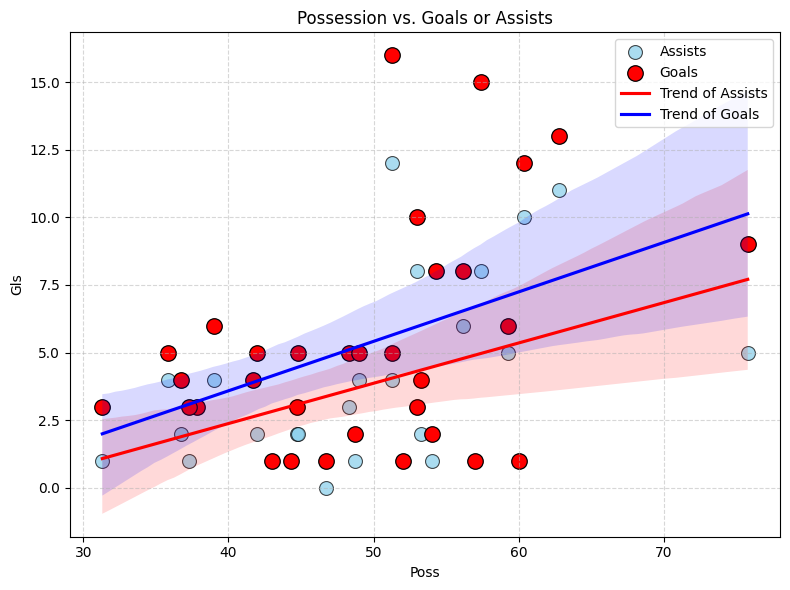

In [5]:
plt.figure(figsize=(8, 6))

# Scatter plot for Possession vs Age
sns.scatterplot(x='Poss', y='Ast', data=stats, s=100, color='skyblue', edgecolor='black', alpha=0.7, label='Assists')

# Scatter plot for Goals
sns.scatterplot(x='Poss', y='Gls', data=stats, s=125, color='red', edgecolor='black', marker='o', label='Goals')

# Add title and labels
plt.title('Possession vs. Goals or Assists')
plt.xlabel('Possession (%)')
plt.ylabel('Age')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Add trend line
sns.regplot(x='Poss', y='Ast', data=stats, scatter=False, color='red', label='Trend of Assists')
sns.regplot(x='Poss', y='Gls', data=stats, scatter=False, color='blue', label='Trend of Goals')

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


####2.5 A histograph to show distribution of  Possession(Poss)

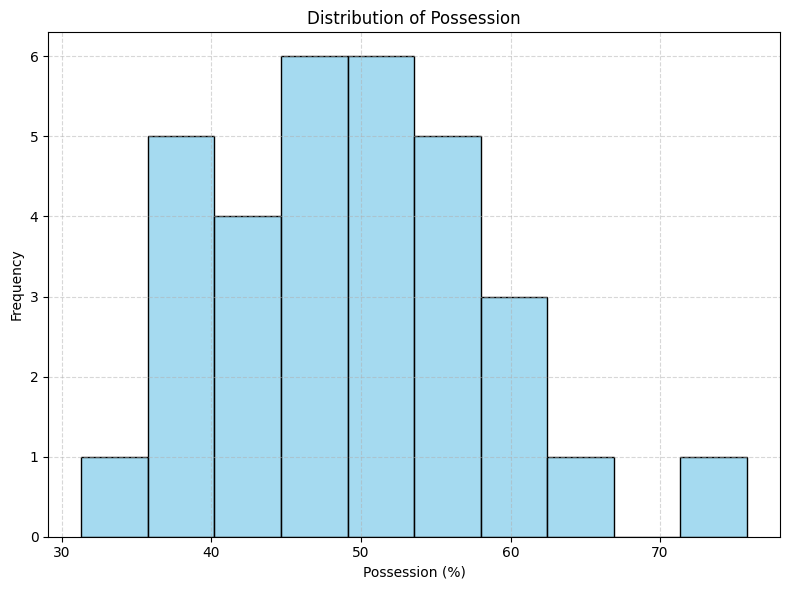

In [6]:
plt.figure(figsize=(8, 6))

# Histogram for Possession
sns.histplot(stats['Poss'], bins=10, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Possession')
plt.xlabel('Possession (%)')
plt.ylabel('Frequency')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# 3. Prepare the data for Machine Learning Algorithms

### 3.1 Remove unwanted expected data columns

In [7]:
# Dropping expected coloumns: xG, npxG, xAG, npxG+xAG, xG90, xAG90, xG+xAG90,npxG90, npxG+xAG90
# They are coloumns that do not effect the prediction and are not needed
stats.drop(labels=['xG', 'npxG', 'xAG', 'npxG+xAG', 'xG90', 'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90'], axis=1, inplace=True)

In [8]:
# Confirm expected coloumns have been removed
stats.columns

Index(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'PrgC', 'PrgP',
       'Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90'],
      dtype='object')

### 3.2 Create a pipeline that will

1. Scale the numerical columns using StandardScaler. Do not scale the target

2. Encode the categorical columns using OneHotEncoder


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [10]:

#create the cat and num columns
num_cols = stats.select_dtypes(include='number').columns.to_list()
cat_cols = stats.select_dtypes(exclude='number').columns.to_list()


#exclude the target from numerical columns
num_cols.remove("Poss")

#create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

#use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

####3.3 Displaying the pipeline

In [11]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['# Pl', 'Age', 'MP', 'Starts', 'Min', '90s',
                                  'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
                                  'CrdY', 'CrdR', 'PrgC', 'PrgP', 'Gls90',
                                  'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Squad'])])

In [12]:
# Apply the preprocessing pipeline on the dataset
stats_prepared = preprocessing.fit_transform(stats)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
stats_prepared = pd.DataFrame(data=stats_prepared, columns=feature_names)

stats_prepared

,num__# Pl,num__Age,num__MP,num__Starts,num__Min,num__90s,num__Gls,num__Ast,num__G+A,num__G-PK,...,cat__Squad_Saudi Arabia,cat__Squad_Senegal,cat__Squad_Serbia,cat__Squad_Spain,cat__Squad_Switzerland,cat__Squad_Tunisia,cat__Squad_United States,cat__Squad_Uruguay,cat__Squad_Wales,remainder__Poss
0,1.432078,0.261526,2.267787,2.267787,2.399424,2.42712,2.382924,1.331035,1.949225,1.768976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.4
1,-0.650945,0.520356,0.000000,0.000000,-0.070159,-0.06742,-0.568827,-0.246488,-0.433648,-0.506692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.8
2,-0.650945,2.159610,-0.755929,-0.755929,-0.743681,-0.74162,-1.060786,-0.877497,-0.994324,-1.075609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
3,2.473589,0.347802,0.755929,0.755929,0.827871,0.80904,0.661069,0.700026,0.687704,0.631142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.2
4,0.390567,0.002696,-0.755929,-0.755929,-0.743681,-0.74162,-0.322848,0.069017,-0.153310,-0.222233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.7
5,-1.171700,0.088973,-0.755929,-0.755929,-0.743681,-0.74162,-1.060786,-0.877497,-0.994324,-1.075609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0
6,0.390567,2.159610,-0.755929,-0.755929,-0.743681,-0.74162,-0.568827,-0.877497,-0.713986,-0.506692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.3
7,-0.130189,0.951738,2.267787,2.267787,2.399424,2.42712,0.661069,1.331035,0.968042,0.915601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.3
8,-0.650945,-0.514963,-0.755929,-0.755929,-0.743681,-0.74162,-1.060786,-0.877497,-0.994324,-1.075609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
9,-1.692456,-1.981665,-0.755929,-0.755929,-0.743681,-0.74162,-0.322848,-0.561992,-0.433648,-0.506692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.3


# 4. Select a model and train it

#### 4.1 Split the dataset into a training dataset (80%) and testing dataset.

In [13]:
from sklearn.model_selection import train_test_split

X = stats_prepared.drop(["remainder__Poss"], axis=1)
y = stats_prepared["remainder__Poss"]

#Split dataset into training set(0.8), testing set(0.2) with random state(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25, 53) (25,) (7, 53) (7,)


#### 4.2 Train a Linear Regression model

In [14]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

#Fit our training set into a linear regression model
lr_model.fit(X_train,y_train)

LinearRegression()

#### Test your model on the test set, and report on the Mean Squared Error

In [15]:
# Predict the outcome of test data and output the mean squared error

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

19.862177112601355

#### 4.3 Train a Linear Regression model using KFold cross-validation with 5 folds, and report on the cross validation score, use negative mean squared error as the cross validation metric.

In [16]:
from sklearn.model_selection import cross_val_score, KFold

# Train the model using KFold cross-validation with 5 folds
scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([ -59.87715448,  -35.98574288, -118.6687774 ,  -67.64010855,
        -65.72977963])

#### 4.4 Calculate the mean of the cross-validation scores to get an overall assessment of the model's performance.

In [17]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')

Cross-Validation Mean Score: 69.5803125877172


#### 4.5 Train a Linear Regression model using Ridge and Lasso regularization with alpha=1

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#Train data using Ride Regression
RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)

#Train data using Lasso Regression
LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)

#### Train and Test Model Elastic Net

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

#Train data using Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)

# Evaluating the model
en_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', en_mse)

Mean Squared Error: 22.903567246142206


#### 4.6 Train and test Polynomial Regression model

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
degree = 4  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Making predictions on the test set
y_pred = poly_model.predict(X_test_poly)

# Evaluating the model
polyR_mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', polyR_mse)

Mean Squared Error: 72.4061519993371


#### 4.7 Test your models on the test dataset and report on the MSE

In [21]:
#Testing various models on test dataset
Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
en_y_pred = elastic_net.predict(X_test)
poly_y_pred = poly_model.predict(X_test_poly)

#Reporting on the MSE of each test data
en_mse = mean_squared_error(y_test, en_y_pred)
polyR_mse = mean_squared_error(y_test, poly_y_pred)
ridge_mse = mean_squared_error(y_test, Ridge_y_predict)
lasso_mse=mean_squared_error(y_test, Lasso_y_predict)

####4.8 Cross Validation for all models


In [22]:
# Train the model using KFold cross-validation with 5 folds
scores_ridge = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_elastic = cross_val_score(elastic_net, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
scores_poly = cross_val_score(poly_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Take the negative value to get the mean squared error
mean_score_ridge = -scores_ridge.mean()
mean_score_lasso = -scores_lasso.mean()
mean_score_poly = -scores_poly.mean()
mean_score_elastic = -scores_elastic.mean()

# Print and compare all models
print(f'Cross-Validation Linear Regression Mean Score: {mean_score}')
print(f'Cross-Validation for Elastic Net Regression Mean Score: {mean_score_elastic}')
print(f'Cross-Validation for Ridge Mean Regression Score: {mean_score_ridge}')
print(f'Cross-Validation for Lasso Mean Regression Score: {mean_score_lasso}')
print(f'Cross-Validation for Polynomial Regression Mean Score: {mean_score_poly}')

Cross-Validation Linear Regression Mean Score: 69.5803125877172
Cross-Validation for Elastic Net Regression Mean Score: 59.56966064718297
Cross-Validation for Ridge Mean Regression Score: 65.32025323754702
Cross-Validation for Lasso Mean Regression Score: 59.54852321009564
Cross-Validation for Polynomial Regression Mean Score: 69.5803125877172


Compare results from all models

In [23]:
# Print and compare all models
print(f'Linear Regression MSE: {lr_mse}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Elastic Net MSE: {en_mse}')
print(f'Polynomial Regression MSE: {polyR_mse}')

Linear Regression MSE: 19.862177112601355
Ridge Regression MSE: 22.114161089189444
Lasso Regression MSE: 32.971899806630724
Elastic Net MSE: 22.903567246142206
Polynomial Regression MSE: 72.4061519993371


#### 4.9 Plot Comparison of Cross-Validation Mean Scores and Mean Square Error for Different Regression Models

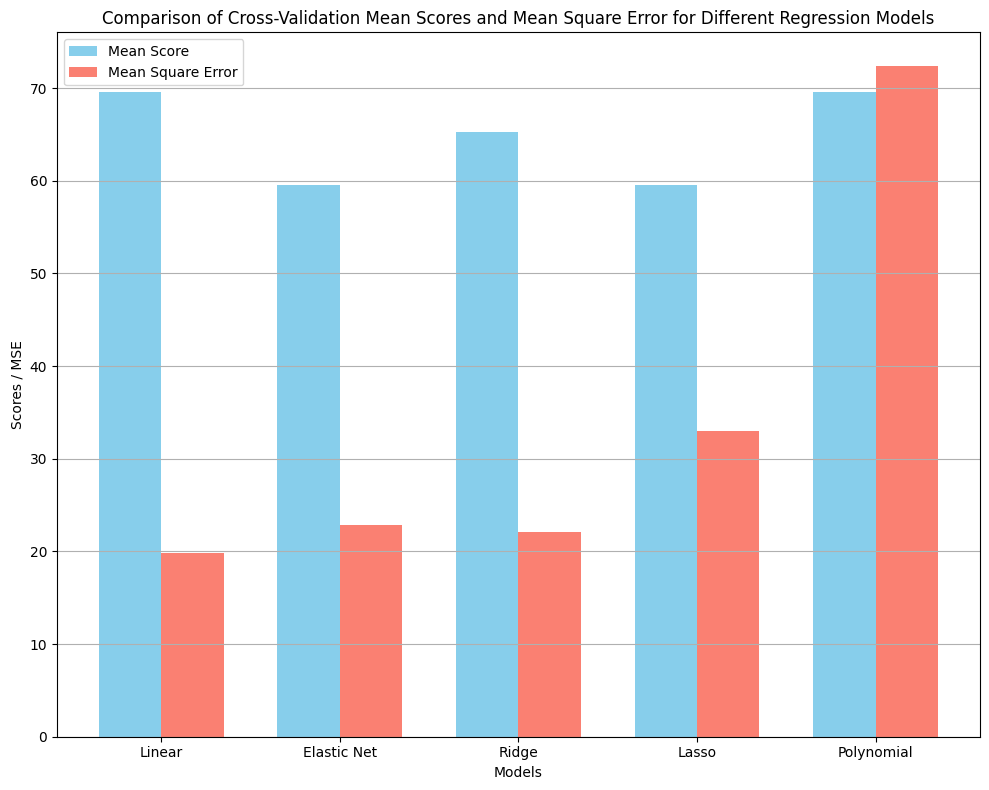

In [24]:
# Data
models = ['Linear', 'Elastic Net', 'Ridge', 'Lasso', 'Polynomial']
mean_scores = [mean_score, mean_score_elastic, mean_score_ridge, mean_score_lasso, mean_score_poly]
mses = [lr_mse, en_mse, ridge_mse, lasso_mse, polyR_mse]

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Bar width
bar_width = 0.35
index = np.arange(len(models))

# Plot mean scores
ax.bar(index - bar_width/2, mean_scores, bar_width, label='Mean Score', color='skyblue')

# Plot MSEs
ax.bar(index + bar_width/2, mses, bar_width, label='Mean Square Error', color='salmon')

# Add labels, title, legend, and grid
ax.set_xlabel('Models')
ax.set_ylabel('Scores / MSE')
ax.set_title('Comparison of Cross-Validation Mean Scores and Mean Square Error for Different Regression Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()


#### 4.10 Plot Ridge Regression Coefficients vs Lasso Regression Coefficients

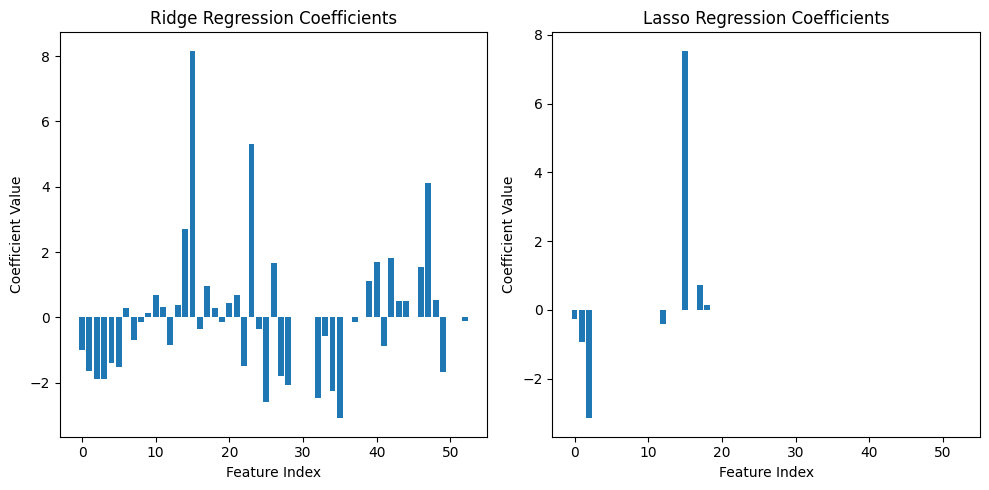

In [25]:
ridge_coefficients = ridge_model.coef_
lasso_coefficients = lasso_model.coef_

# Plot coefficients
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(ridge_coefficients)), ridge_coefficients)
plt.title('Ridge Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.subplot(1, 2, 2)
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.title('Lasso Regression Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()


# 5. Graphs for best AI Algorithm

#### 5.1 Plot Actual data vs Predicted data

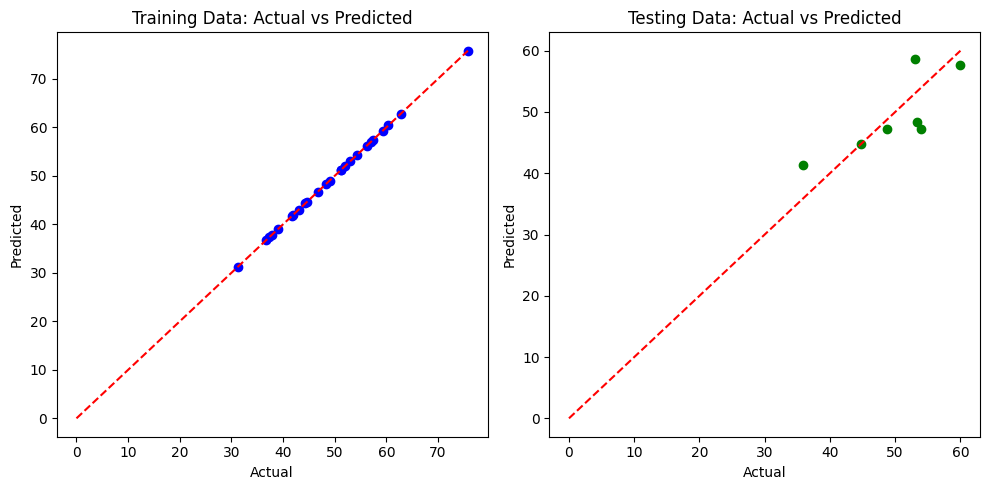

In [26]:
# Plotting the predicted values versus the actual values for training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, lr_model.predict(X_train), color='blue')
plt.plot([0, max(y_train)], [0, max(y_train)], color='red', linestyle='--')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting the predicted values versus the actual values for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, lr_y_predict, color='green')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


#### 5.2 Plot accuracy comparison between training and testing data

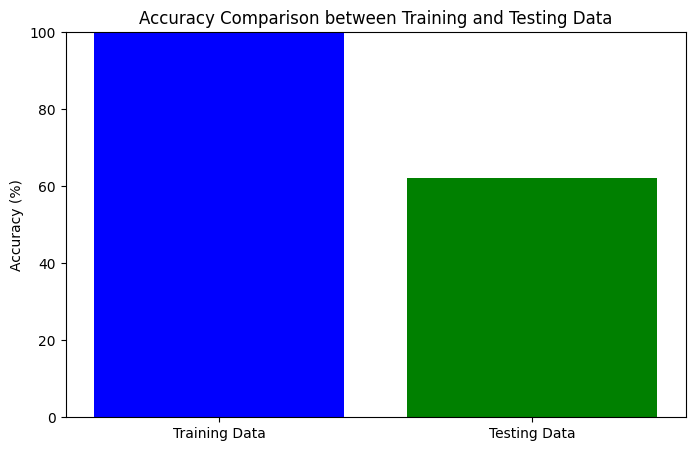

In [27]:
# Calculate the mean squared error for training and testing data
train_mse = mse(y_train, lr_model.predict(X_train))
test_mse = mse(y_test, lr_y_predict)

# Calculate the accuracy in percentage
train_accuracy = 100 * (1 - (train_mse / np.var(y_train)))
test_accuracy = 100 * (1 - (test_mse / np.var(y_test)))

# Plotting the accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(['Training Data', 'Testing Data'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title('Accuracy Comparison between Training and Testing Data')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100
plt.show()


#### 5.3 Plot residuals against predicted values

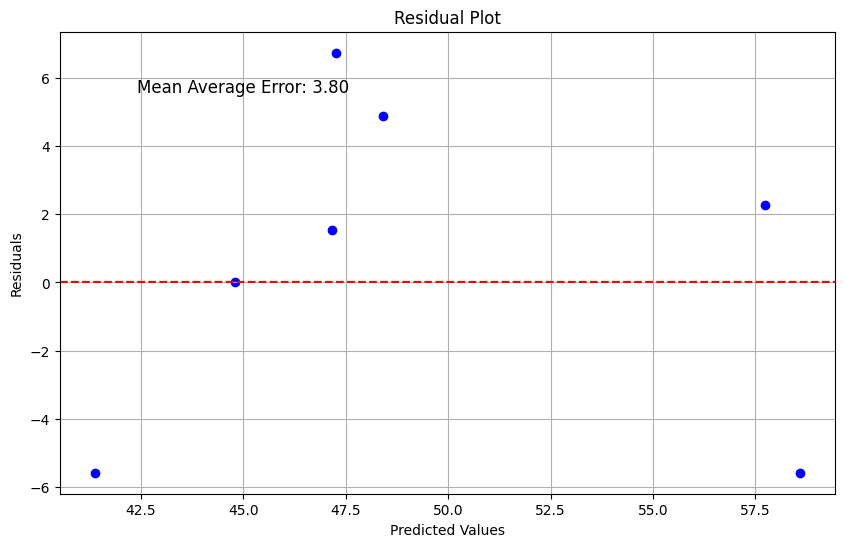

In [28]:
# Calculating residuals
residuals = y_test - lr_y_predict

plt.figure(figsize=(10, 6))

# Plotting residuals against predicted values
plt.scatter(lr_y_predict, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Calculate mean absolute error
mae = np.mean(np.abs(residuals))

# Add MAE to the plot
plt.text(0.1, 0.9, f'Mean Average Error: {mae:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()